In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [2]:
df = pd.read_csv("phoneprices.csv")

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
x = df.iloc[:,:-1]

x_normalized = (x - x.min()) / (x.max() - x.min())

x_normalized

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [4]:
y = pd.get_dummies(df.iloc[:,-1], prefix='y')

y

,y_0,y_1,y_2,y_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1995,1,0,0,0
1996,0,0,1,0
1997,0,0,0,1
1998,1,0,0,0


In [20]:
df_combined = pd.concat([x_normalized, y], axis=1)

df_combined

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,y_0,y_1,y_2,y_3
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.285714,0.388889,0.944444,0.0,0.0,1.0,0,1,0,0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.857143,0.166667,0.277778,1.0,1.0,0.0,0,0,1,0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.428571,0.111111,0.388889,1.0,1.0,0.0,0,0,1,0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.785714,0.444444,0.500000,1.0,0.0,0.0,0,0,1,0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.214286,0.111111,0.722222,1.0,1.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.571429,0.222222,0.944444,1.0,1.0,0.0,1,0,0,0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.428571,0.555556,0.777778,1.0,1.0,1.0,0,0,1,0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.285714,0.055556,0.166667,1.0,1.0,0.0,0,0,0,1
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.928571,0.555556,0.944444,1.0,1.0,1.0,1,0,0,0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3)

len_input = len(x_train.columns)
len_output = len(y_train.columns)

print("Len Input: {}".format(len_input))
print("Len Output: {}".format(len_output))

Len Input: 20
Len Output: 4


In [6]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.n_samples = len(x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

In [7]:
def one_hot_encoding(nd_array):
    one_hot_encoding_predictions = nd_array

    for i in range(len(nd_array)):
        max_pred = max(nd_array[i])

        for j in range(len(nd_array[i])):
            one_hot_encoding_predictions[i][j] = 1 if nd_array[i][j] == max_pred else 0

    return one_hot_encoding_predictions

In [8]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_1 = nn.Linear(input_dim, 10)
        self.output = nn.Linear(10, output_dim)

    def forward(self, x):
        # f(x) = a(f(x))
        x = F.relu(self.input_1(x))
        x = torch.sigmoid(self.output(x))
        y = F.softmax(x, dim=-1)

        return y

model = MultiLayerPerceptron(len_input, len_output)

In [9]:
def train_fn(loader, model, optimizer, loss_fn, device):
    loop = tqdm(loader)

    average_loss = 0
    count = 0
    
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Forward
        predictions = model.forward(data)
        
        predictions = F.softmax(predictions, dim=-1)
        
        loss = loss_fn(predictions, targets)
        
        # Backward
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        # Update tqdm
        loop.set_postfix(loss=loss.item())

        average_loss += loss.item()
        count += 1
    
    average_loss = average_loss / count

    return average_loss

In [10]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 254 trainable parameters


In [11]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

device = 'cpu'
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

batch_size = 5

epochs = 100

In [12]:
x_train = torch.tensor(x_train.values).float().to(device)
y_train = torch.tensor(y_train.values).float().to(device)

x_test = torch.tensor(x_test.values).float().to(device)
y_test = torch.tensor(y_test.values).float().to(device)

training_ds = CustomDataset(x_train, y_train)

train_loader = DataLoader(
    training_ds,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([1400, 20])
torch.Size([1400, 4])
torch.Size([600, 20])
torch.Size([600, 4])


In [13]:
# Convert y_test to numpy array
y_test = y_test.detach().cpu().numpy()

# Array to store the losses
losses = []

# Array to store accuracy score
accuracies = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    average_loss = train_fn(train_loader, model, optimizer, criterion, device)

    # Perform a prediction at every epoch
    one_hot_encoding_predictions = one_hot_encoding(
        model.forward(x_test).detach().cpu().numpy()
    )

    print(one_hot_encoding)

    # Get the accuracy at every epoch
    acc_score = accuracy_score(
        y_test,
        one_hot_encoding_predictions
    )

    losses.append(average_loss)

    accuracies.append(acc_score)

    print("Average Loss: {}".format(average_loss))
    print("Acc Score: {}".format(acc_score))

Epoch: 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 383.17it/s, loss=1.37]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.378302207163402
Acc Score: 0.64
Epoch: 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 339.49it/s, loss=1.36]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3621621710913523
Acc Score: 0.48333333333333334
Epoch: 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 383.96it/s, loss=1.36]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3584689131804875
Acc Score: 0.48333333333333334
Epoch: 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 347.36it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.356876288993018
Acc Score: 0.48333333333333334
Epoch: 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 360.01it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.35578995347023
Acc Score: 0.48333333333333334
Epoch: 5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 363.35it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.355022582411766
Acc Score: 0.48333333333333334
Epoch: 6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 413.85it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3544721237250736
Acc Score: 0.48333333333333334
Epoch: 7


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 348.49it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3540597017322267
Acc Score: 0.48333333333333334
Epoch: 8


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 374.74it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.353706760065896
Acc Score: 0.48333333333333334
Epoch: 9


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 367.94it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3534061261585781
Acc Score: 0.48333333333333334
Epoch: 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 435.16it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3531556572232928
Acc Score: 0.48333333333333334
Epoch: 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 447.69it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3529427289962768
Acc Score: 0.48333333333333334
Epoch: 12


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 420.89it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3527601127113615
Acc Score: 0.48333333333333334
Epoch: 13


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 451.06it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3526175592626843
Acc Score: 0.48333333333333334
Epoch: 14


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 418.00it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3524990111589432
Acc Score: 0.48333333333333334
Epoch: 15


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 381.95it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3523900721754347
Acc Score: 0.48333333333333334
Epoch: 16


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 425.69it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.352290672489575
Acc Score: 0.48333333333333334
Epoch: 17


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 441.74it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3522011884621212
Acc Score: 0.48333333333333334
Epoch: 18


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 464.33it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.352120224918638
Acc Score: 0.48333333333333334
Epoch: 19


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 431.07it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3520530683653695
Acc Score: 0.48333333333333334
Epoch: 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 450.74it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.352003292952265
Acc Score: 0.48333333333333334
Epoch: 21


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 472.22it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3520480019705636
Acc Score: 0.48333333333333334
Epoch: 22


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 488.36it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3519441664218903
Acc Score: 0.48333333333333334
Epoch: 23


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 470.82it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3518389446394785
Acc Score: 0.48333333333333334
Epoch: 24


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 473.44it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3518306391579764
Acc Score: 0.48333333333333334
Epoch: 25


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 507.71it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3517566165753774
Acc Score: 0.48333333333333334
Epoch: 26


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 482.03it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3517486074141094
Acc Score: 0.48333333333333334
Epoch: 27


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 483.42it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.351765501499176
Acc Score: 0.48333333333333334
Epoch: 28


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 426.16it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3516681224107743
Acc Score: 0.48333333333333334
Epoch: 29


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 454.16it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3514609434774945
Acc Score: 0.48333333333333334
Epoch: 30


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 463.04it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3515742889472417
Acc Score: 0.48333333333333334
Epoch: 31


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 462.56it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.351567013348852
Acc Score: 0.48333333333333334
Epoch: 32


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 443.11it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.351408095870699
Acc Score: 0.48333333333333334
Epoch: 33


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 461.30it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.351388214315687
Acc Score: 0.48333333333333334
Epoch: 34


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 462.00it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3516204144273485
Acc Score: 0.48333333333333334
Epoch: 35


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 449.91it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.351736153449331
Acc Score: 0.48333333333333334
Epoch: 36


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 463.49it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.351408282348088
Acc Score: 0.48333333333333334
Epoch: 37


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 461.92it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.351403167418071
Acc Score: 0.48333333333333334
Epoch: 38


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 481.39it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3513049572706222
Acc Score: 0.48333333333333334
Epoch: 39


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 498.32it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3513216755219868
Acc Score: 0.485
Epoch: 40


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 477.83it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3513142687933786
Acc Score: 0.485
Epoch: 41


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 482.41it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3515917224543434
Acc Score: 0.485
Epoch: 42


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 472.64it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3512515251125607
Acc Score: 0.485
Epoch: 43


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 480.42it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3513247804982322
Acc Score: 0.485
Epoch: 44


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 483.74it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3511986728225436
Acc Score: 0.4866666666666667
Epoch: 45


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 494.25it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3513761098895753
Acc Score: 0.49
Epoch: 46


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 485.84it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3514439123017448
Acc Score: 0.485
Epoch: 47


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 491.81it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3512550111327852
Acc Score: 0.4866666666666667
Epoch: 48


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 478.01it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3509780040809087
Acc Score: 0.49166666666666664
Epoch: 49


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 483.08it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3510329659496034
Acc Score: 0.49666666666666665
Epoch: 50


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 472.34it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.351050353901727
Acc Score: 0.49833333333333335
Epoch: 51


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 487.76it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3508821687528065
Acc Score: 0.49666666666666665
Epoch: 52


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 496.08it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.350899104135377
Acc Score: 0.5
Epoch: 53


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 467.95it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3511250478880745
Acc Score: 0.5033333333333333
Epoch: 54


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 474.09it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3510433409895215
Acc Score: 0.5083333333333333
Epoch: 55


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 490.20it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3509643686669213
Acc Score: 0.5066666666666667
Epoch: 56


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 462.11it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3508696534803935
Acc Score: 0.5083333333333333
Epoch: 57


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 459.62it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3512397093432291
Acc Score: 0.525
Epoch: 58


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 467.89it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3514067892517363
Acc Score: 0.53
Epoch: 59


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 477.92it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3515130626303808
Acc Score: 0.545
Epoch: 60


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 471.06it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.351668639268194
Acc Score: 0.5983333333333334
Epoch: 61


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 490.79it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3512257754802703
Acc Score: 0.5833333333333334
Epoch: 62


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 447.49it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.350064565879958
Acc Score: 0.6716666666666666
Epoch: 63


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 478.05it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3461377501487732
Acc Score: 0.685
Epoch: 64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 496.28it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3440442881413868
Acc Score: 0.6716666666666666
Epoch: 65


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 470.94it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3430987864732742
Acc Score: 0.685
Epoch: 66


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 496.53it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3424540924174444
Acc Score: 0.7
Epoch: 67


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 481.36it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.342069324851036
Acc Score: 0.6966666666666667
Epoch: 68


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 481.45it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3413860014506749
Acc Score: 0.6816666666666666
Epoch: 69


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 467.85it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3410719024283546
Acc Score: 0.695
Epoch: 70


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 472.38it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3406413389103753
Acc Score: 0.685
Epoch: 71


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 473.25it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3406951014484678
Acc Score: 0.6816666666666666
Epoch: 72


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 471.03it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.340223590391023
Acc Score: 0.68
Epoch: 73


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 464.94it/s, loss=1.35]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.340059214404651
Acc Score: 0.6783333333333333
Epoch: 74


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 466.53it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3395021136317935
Acc Score: 0.6816666666666666
Epoch: 75


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 490.49it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3393117065940585
Acc Score: 0.6816666666666666
Epoch: 76


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 464.50it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3390824326447077
Acc Score: 0.68
Epoch: 77


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 477.45it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3391727749790465
Acc Score: 0.68
Epoch: 78


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 505.05it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3388904861041477
Acc Score: 0.6933333333333334
Epoch: 79


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 445.06it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3389667821781976
Acc Score: 0.6916666666666667
Epoch: 80


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 439.22it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3386404309953963
Acc Score: 0.6833333333333333
Epoch: 81


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 438.82it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.338524511882237
Acc Score: 0.6883333333333334
Epoch: 82


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 403.23it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.338813854966845
Acc Score: 0.6783333333333333
Epoch: 83


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 361.58it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3384196264403208
Acc Score: 0.7
Epoch: 84


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 366.49it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3384013235569001
Acc Score: 0.6866666666666666
Epoch: 85


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 386.43it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.33857584638255
Acc Score: 0.69
Epoch: 86


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 425.84it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3383247643709182
Acc Score: 0.6916666666666667
Epoch: 87


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 424.68it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3384548080818994
Acc Score: 0.6933333333333334
Epoch: 88


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 434.00it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3383569568395615
Acc Score: 0.69
Epoch: 89


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 452.45it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3381015496594566
Acc Score: 0.6933333333333334
Epoch: 90


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 461.02it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3379796317645483
Acc Score: 0.685
Epoch: 91


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 425.95it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3380033705915724
Acc Score: 0.6866666666666666
Epoch: 92


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 452.95it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3379934098039354
Acc Score: 0.6883333333333334
Epoch: 93


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 468.38it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.33770871588162
Acc Score: 0.6833333333333333
Epoch: 94


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 465.15it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.337606908593859
Acc Score: 0.6816666666666666
Epoch: 95


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 459.87it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3378441780805588
Acc Score: 0.695
Epoch: 96


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 405.16it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3378458934170858
Acc Score: 0.6866666666666666
Epoch: 97


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 428.84it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3375963002443314
Acc Score: 0.6933333333333334
Epoch: 98


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 463.97it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.337844854593277
Acc Score: 0.6883333333333334
Epoch: 99


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 484.42it/s, loss=1.34]


<function one_hot_encoding at 0x7fd6a65b7520>
Average Loss: 1.3375498426812036
Acc Score: 0.6816666666666666


In [14]:
predictions = model.forward(x_test)

print(predictions.shape)

torch.Size([600, 4])


In [15]:
one_hot_encoding_predictions = one_hot_encoding(predictions.detach().cpu( ).numpy())

one_hot_encoding_predictions

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [16]:
accuracy = accuracy_score(y_test, one_hot_encoding_predictions)

print("Accuracy: {}".format(accuracy))

Accuracy: 0.6816666666666666


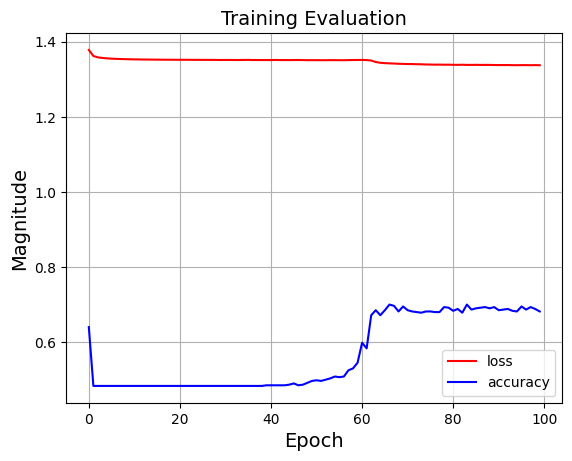

In [17]:
plt.plot(losses, label='loss', color='red')
plt.plot(accuracies, label='accuracy', color='blue')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()